In [1]:
import io
import requests
import urllib3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
requests.packages.urllib3.disable_warnings()
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += ':HIGH:!DH:!aNULL'
try:
    requests.packages.urllib3.contrib.pyopenssl.util.ssl_.DEFAULT_CIPHERS += ':HIGH:!DH:!aNULL'
except AttributeError:
    # no pyopenssl support used / needed / available
    pass

## See error when not running it in https://stackoverflow.com/questions/38015537/python-requests-exceptions-sslerror-dh-key-too-small

In [3]:
## data home page: https://www.data.gv.at/katalog/dataset/covid-19-schutzimpfungen-impfungen-in-gemeinden

url = "https://info.gesundheitsministerium.gv.at/data/impfungen-gemeinden.csv"

csvfile = requests.get(url, verify=False).content
vaccination = pd.read_csv(io.StringIO(csvfile.decode('utf-8')), sep=";")

In [4]:
vaccination.head()

,Datum,Gemeindecode,Bevölkerung,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021-11-29T23:59:59+01:00,10101,14895,11335,76.099362,10768,72.292716
1,2021-11-29T23:59:59+01:00,10201,2000,1551,77.550000,1474,73.700000
2,2021-11-29T23:59:59+01:00,10301,1883,1474,78.279341,1421,75.464684
3,2021-11-29T23:59:59+01:00,10302,1841,1455,79.033134,1397,75.882672
4,2021-11-29T23:59:59+01:00,10303,2122,1642,77.379830,1572,74.081056


In [5]:
vaccination.Gemeindecode.unique()

array([10101, 10201, 10301, ..., 92101, 92201, 92301])

In [6]:
vaccination[vaccination["Gemeindecode"] == 10101]

,Datum,Gemeindecode,Bevölkerung,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021-11-29T23:59:59+01:00,10101,14895,11335,76.099362,10768,72.292716


<AxesSubplot:xlabel='Gemeindecode', ylabel='Vollimmunisierte'>

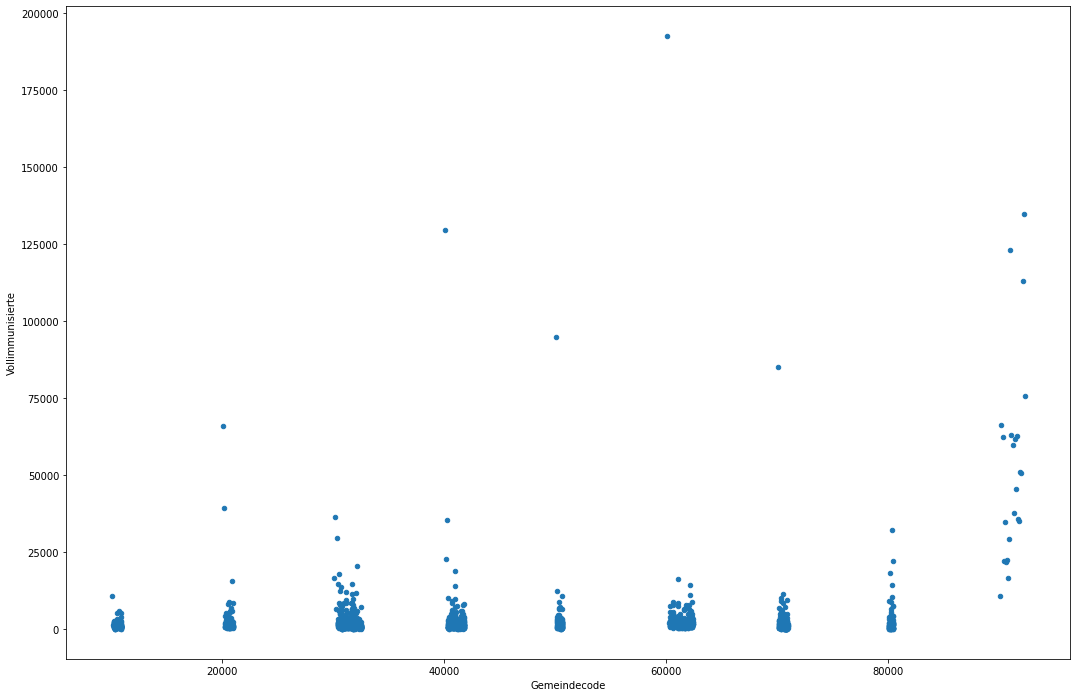

In [12]:
vaccination.plot.scatter(x="Gemeindecode", y="Vollimmunisierte", figsize=(18,12))

#### Second Example

Data from https://www.data.gv.at/katalog/dataset/interkultureller-kalender-wien/resource/426ed8c8-887f-4c44-84ed-7682f2ddbe55

In [1]:
import pandas as pd

In [28]:
my_data = pd.read_csv('/home/renato/Downloads/interkultureller-kalender-2022.csv', encoding='latin1', skiprows=5, sep=';')

In [29]:
my_data.head(20)

,Datum,Kategorie,Titel,Beschreibung
0,01. Jän 22,Internationale und traditionelle Erinnerungs- ...,Neujahr (staatlicher Feiertag),Beginn des Jahres nach dem gregorianischen Kal...
1,06. Jän 22,Christentum,"Heilige Drei Könige (katholisch, evangelisch, ...","Beim Dreikönigsfest (auch Epiphanie, das heißt..."
2,06. Jän 22,Christentum,Orthodoxer Heiliger Abend (nach julianischem K...,"Als Symbol für den Stall, den Ort der Geburt J..."
3,07. Jän 22,Christentum,Orthodoxes Weihnachten/Orthodoxer Christtag (n...,Serbische Bräuche: Am frühen Morgen besucht ei...
4,17. Jän 22,Judentum,Tu BiSchwat,"In Hebräisch so viel wie: ""15. Tag im Monat Sc..."
5,01. Feb 22,Internationale und traditionelle Erinnerungs- ...,Chinesisches Neujahr,Nach dem chinesischen Kalender beginnt das Jah...
6,02. Feb 22,Christentum,Mariä Lichtmess / Darstellung des Herrn (katho...,"Auch ""Einführung Jesu in den Tempel"" genannt. ..."
7,10. Feb 22,Islam,Hizir Fest,8. bis 10. Februar: Hizir Fasten / Festtag (am...
8,14. Feb 22,Internationale und traditionelle Erinnerungs- ...,Valentinstag,An diesem Tag werden Blumen als Zeichen der Zu...
9,02. Mär 22,Christentum,"Aschermittwoch (katholisch, evangelisch)",Für die katholischen Christinnen und Christen ...


In [38]:
filtered = my_data[(my_data['Kategorie'] == 'Christentum') | (my_data['Titel'].str.contains('Heilige'))]

In [39]:
type(filtered)

pandas.core.frame.DataFrame

In [40]:
filtered

,Datum,Kategorie,Titel,Beschreibung
1,06. Jän 22,Christentum,"Heilige Drei Könige (katholisch, evangelisch, ...","Beim Dreikönigsfest (auch Epiphanie, das heißt..."
2,06. Jän 22,Christentum,Orthodoxer Heiliger Abend (nach julianischem K...,"Als Symbol für den Stall, den Ort der Geburt J..."
3,07. Jän 22,Christentum,Orthodoxes Weihnachten/Orthodoxer Christtag (n...,Serbische Bräuche: Am frühen Morgen besucht ei...
6,02. Feb 22,Christentum,Mariä Lichtmess / Darstellung des Herrn (katho...,"Auch ""Einführung Jesu in den Tempel"" genannt. ..."
9,02. Mär 22,Christentum,"Aschermittwoch (katholisch, evangelisch)",Für die katholischen Christinnen und Christen ...
17,10. Apr 22,Christentum,"Palmsonntag (katholisch, evangelisch)",Der erste Tag der Karwoche erinnert an den tri...
18,14. Apr 22,Christentum,"Gründonnerstag (katholisch, evangelisch)",\nDie Christinnen und Christen erinnern sich a...
20,15. Apr 22,Christentum,"Karfreitag (katholisch, evangelisch)",Der Karfreitag steht im Gedenken an die Kreuzi...
21,15. Apr 22,Christentum,Gedächtnismahl beziehungsweise Abendmahl (Zeug...,Gedenkfeier zum Tode Jesu.
23,16. Apr 22,Christentum,"Karsamstag (katholisch, evangelisch)",Die Osternacht von Karsamstag auf Ostersonntag...
